https://www.kaggle.com/shreayan98c/boston-house-price-prediction

In [1]:
import pandas as pd 
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
# Initializing the dataframe
data = pd.DataFrame(boston.data)

In [4]:
# See the dataset
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# adding the feature names to dataframe
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


FEATURE NAMES <br>
CRIM - per capita crime rate by town<br>
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.<br>
INDUS - proportion of non-retail business acres per town.<br>
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)<br>
NOX - nitric oxides concentration (parts per 10 million)<br>
RM - average number of rooms per dwelling<br>
AGE - proportion of owner-occupied units built prior to 1940<br>
DIS - weighted distances to five Boston employment centres<br>
RAD - index of accessibility to radial highways<br>
TAX - full-value property-tax rate per $10,000<br>
PTRATIO - pupil-teacher ratio by town<br>
<br>
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town<br>
<br>
LSTAT - % lower status of the population<br>

MEDV - Median value of owner-occupied homes in $1000's<br>

In [6]:
# adding target variable to dataframe
data['PRICE'] = boston.target

In [7]:
data.shape

(506, 14)

In [8]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [9]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [10]:
# identifying the unique number of values in the dataset
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [11]:
# check the missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [12]:
# see rows with missing values
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


In [13]:
# Viewing the data statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
# finding out the correlations between the features
corr = data.corr()
corr.shape

(14, 14)

<AxesSubplot:>

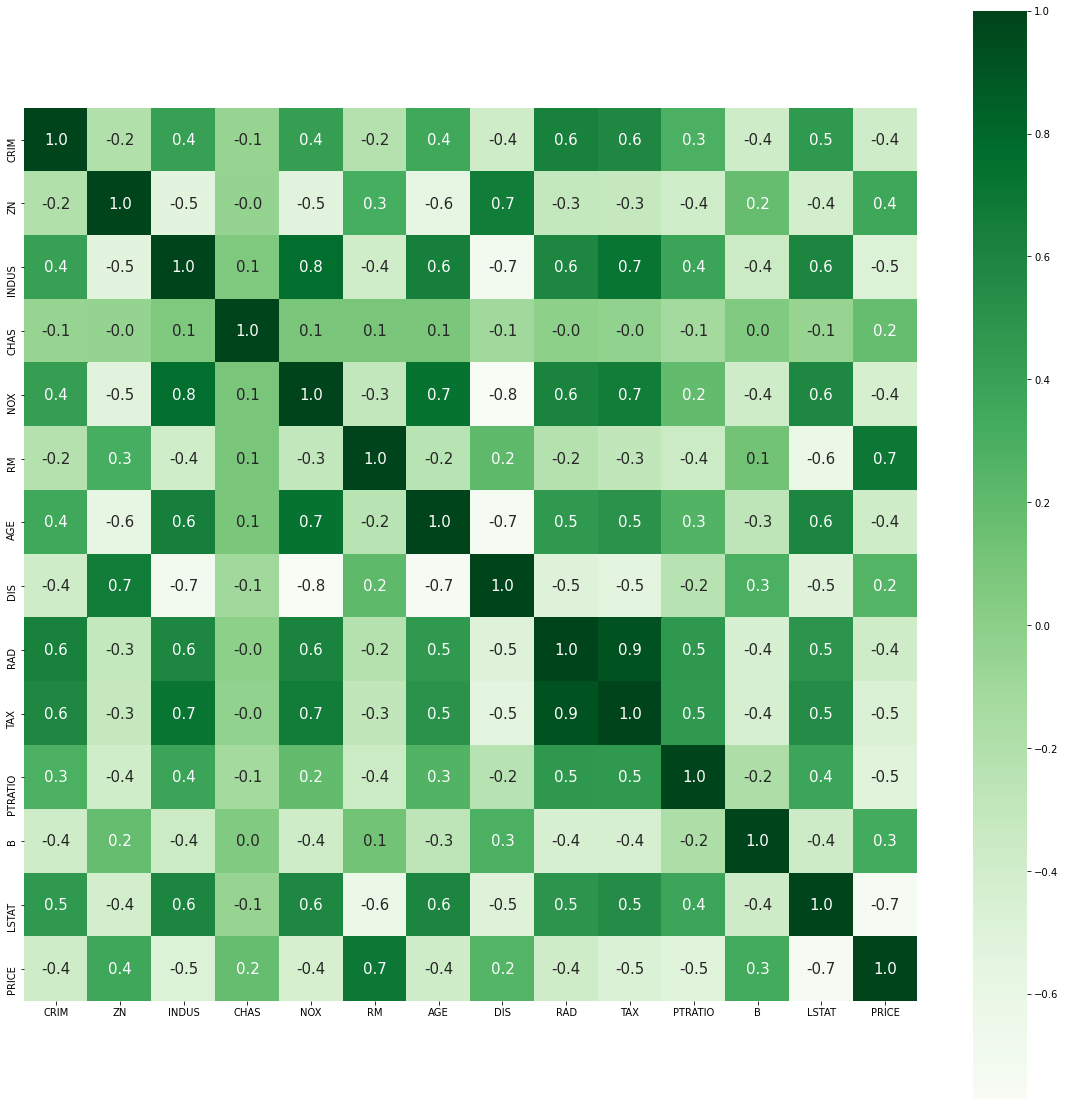

In [15]:
# plotting the heatmap of correlations betweens features
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True,
           annot_kws={'size':15}, cmap='Greens')

In [16]:
# splitting target variable and independent variables
X = data.drop(['PRICE'], axis=1)
y = data['PRICE']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)


## Linear Regression

In [17]:
# import library for library Regression
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [18]:
lm.intercept_

36.35704137659466

In [19]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.12257
1,ZN,0.0556777
2,INDUS,-0.00883428
3,CHAS,4.69345
4,NOX,-14.4358
5,RM,3.28008
6,AGE,-0.00344778
7,DIS,-1.55214
8,RAD,0.32625
9,TAX,-0.0140666


Model Evaluation

In [20]:
y_test_pred = lm.predict(X_test)

In [21]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7121818377409181
Adjusted R^2: 0.6850685326005699
MAE: 3.859005592370746
MSE: 30.053993307124284
RMSE: 5.482152251362988


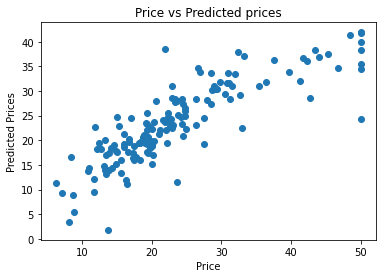

In [22]:
# Visulising the different between actual prices and predicted values
plt.scatter(y_test, y_test_pred)
plt.xlabel("Price")
plt.ylabel("Predicted Prices")
plt.title("Price vs Predicted prices")
plt.show()

# Random forest generator

### train the model

In [23]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets
reg.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [25]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8345172179238952
Adjusted R^2: 0.8189282601920882
MAE: 2.483578947368421
MSE: 17.279724065789484
RMSE: 4.156888748305574


# XGBoost Regressor

### training the model

In [26]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

# Create a XGBoost Regressor
reg = XGBRegressor()

# Training model
reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
#Prediciting data with the model
y_test_pred = reg.predict(X_test)

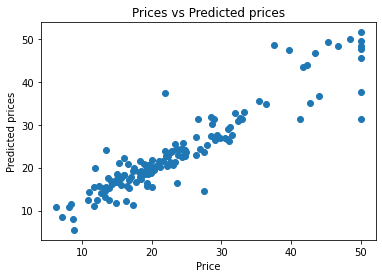

In [28]:
# Visualising the difference
plt.scatter(y_test, y_test_pred)
plt.xlabel("Price")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [29]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8579951986672496
Adjusted R^2: 0.8446179347735847
MAE: 2.5309582503218397
MSE: 14.828151619536392
RMSE: 3.850733906612659


# SVM Regressor

In [30]:
# creating scaled set to be used in model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
# Import SVM Regressor
from sklearn import svm

# create a SVM regressor
reg = svm.SVR()

In [32]:
# Train the model using the training sets
reg.fit(X_train, y_train)

SVR()

In [33]:
# Model Prediction
y_test_pred = reg.predict(X_test)

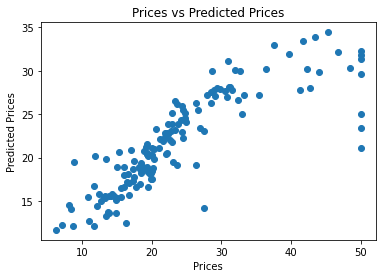

In [34]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")
plt.show()

In [35]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


R^2: 0.5900158460478174
Adjusted R^2: 0.5513941503856553
MAE: 3.7561453553021686
MSE: 42.81057499010247
RMSE: 6.542979060802691


In [36]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', ' XGBoost', 
             'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, 
                       acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,85.799520
1,Random Forest,83.451722
0,Linear Regression,71.218184
3,Support Vector Machines,59.001585
